In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
import statistics

In [3]:
import sqlite3

In [4]:
con = sqlite3.connect("data/peroonpe.db")
cur = con.cursor()

In [5]:
# data frame de ubicaciones
df_ubicacion = pd.read_sql_query("select * from ubicacion", con)
df_ubicacion.head()

id  distrito provincia departamento
0   1  ARAMANGO     BAGUA     AMAZONAS
1   2     BAGUA     BAGUA     AMAZONAS
2   3  COPALLIN     BAGUA     AMAZONAS
3   4  EL PARCO     BAGUA     AMAZONAS
4   5     IMAZA     BAGUA     AMAZONAS

In [5]:
df_locales = pd.read_sql_query("select * from local", con)
df_locales.head()

id                                  nombre_local  \
0   1                       IE MIGUEL MONTEZA TAFUR   
1   2                        IE SECUNDARIO AMAZONAS   
2   3  IE VICTOR RAUL HAYA DE LA TORRE - SECUNDARIA   
3   4                                      IE 16201   
4   5                               IEIPSM Nº 16194   

                     direccion  ubicacion_id  
0            AV 28 DE JULIO SN             1  
1  JR CRUZ PARRA Y BELAUNDE SN             1  
2              AV PRINCIPAL SN             1  
3            AV 28 DE JULIO SN             1  
4          JR ICA SN CUADRA 12             2

In [6]:
df_distrito = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where distrito = "ARAMANGO")) order by V.mesa', con)
df_distrito.head()

mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes
0   169        51        95                5            5             156
1   170        43       112                0           14             169
2   171        62        85                0           10             157
3   172        80        96                1            7             184
4   173        53        99                4            8             164

In [7]:
# calculamos totales
total_votantes = df_distrito['total_votantes'].sum()
total_votos_fp = df_distrito['votos_fp'].sum()
total_votos_pl = df_distrito['votos_pl'].sum()
# calculamos totales para blancos y nulos
total_nulos = df_distrito['votos_nulos'].sum()
total_blancos = df_distrito['votos_en_blanco'].sum()

# calculamos el porcentaje por el distrito / local / provincia / departamento / pais.
total_votos_fp_p = total_votos_fp / total_votantes
total_votos_pl_p = total_votos_pl / total_votantes
# calculamos la frecuencia
total_nulos_p = total_nulos / total_votantes
total_blancos_p = total_blancos / total_votantes


# calculamos frecuencia
df_distrito['pl_p'] = df_distrito['votos_pl'] / total_votantes
df_distrito['fp_p'] = df_distrito['votos_fp'] / total_votantes
df_distrito['nulos_p'] = df_distrito['votos_nulos'] / total_votantes
df_distrito['blanco_p'] = df_distrito['votos_en_blanco'] / total_votantes

# calculamos las diferencias
df_distrito['dif_dis_pl'] = df_distrito['pl_p'] - total_votos_pl_p
df_distrito['dif_dis_fp'] = df_distrito['fp_p'] - total_votos_fp_p
df_distrito['dif_dis_nulos'] = df_distrito['nulos_p'] - total_nulos_p
df_distrito['dif_dis_blanco'] = df_distrito['blanco_p'] - total_blancos_p
df_distrito.head()


mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes  \
0   169        51        95                5            5             156   
1   170        43       112                0           14             169   
2   171        62        85                0           10             157   
3   172        80        96                1            7             184   
4   173        53        99                4            8             164   

       pl_p      fp_p   nulos_p  blanco_p  dif_dis_pl  dif_dis_fp  \
0  0.017170  0.009217  0.000904  0.000904   -0.591542   -0.316646   
1  0.020242  0.007772  0.002530  0.000000   -0.588469   -0.318091   
2  0.015362  0.011205  0.001807  0.000000   -0.593349   -0.314658   
3  0.017350  0.014459  0.001265  0.000181   -0.591361   -0.311404   
4  0.017893  0.009579  0.001446  0.000723   -0.590819   -0.316284   

   dif_dis_nulos  dif_dis_blanco  
0      -0.053136       -0.010483  
1      -0.051509       -0.011386  
2      -0.052232       -0.011386  
3      -0.052774       -0.011205  
4      -0.052594       -0.010663

                  0             1             2             3
count  3.100000e+01  3.100000e+01  3.100000e+01  3.100000e+01
mean  -7.154492e-14 -1.283382e-14  8.430532e-15 -2.292073e-15
std    1.016530e+00  1.016530e+00  1.016530e+00  1.016530e+00
min   -2.032601e+00 -2.304931e+00 -1.257488e+00 -2.052013e+00
25%   -7.861424e-01 -5.633920e-01 -6.387238e-01 -8.168206e-01
50%   -2.273851e-01 -1.155676e-01 -1.996012e-02  1.095735e-01
75%    8.041668e-01  4.317734e-01  9.081854e-01  7.271695e-01
max    2.093607e+00  2.471862e+00  1.836331e+00  1.962362e+00


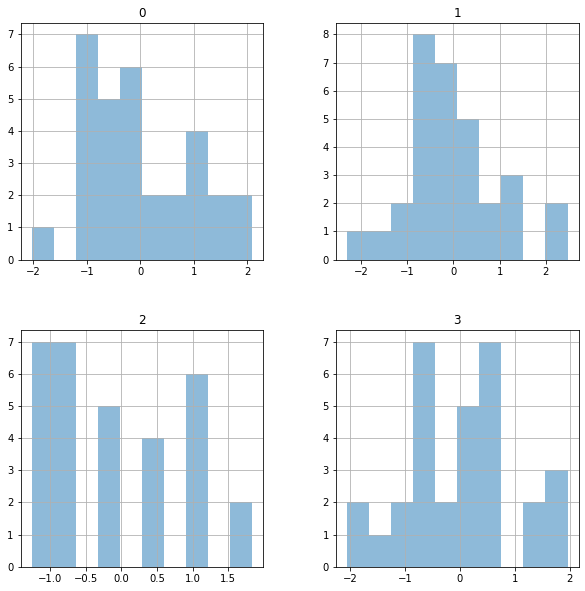

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
scaler = StandardScaler()

selected = df_distrito[["dif_dis_pl",	
                "dif_dis_fp",
                "dif_dis_blanco",
                "dif_dis_nulos"]]
df_dif_distrito = selected.copy()

data = scaler.fit_transform(df_dif_distrito)
df_his = DataFrame(data)
print(df_his.describe())
df_his.hist(alpha=0.5)
plt.show()


In [9]:
# Calculamos el histograma general
df_total = pd.read_sql_query("Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V  order by V.mesa", con)
df_total.head()

mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes
0     1        81       118                1         14.0           214.0
1     2        87       123                0         16.0           226.0
2     3        73       122                2         19.0           216.0
3     4        89       131                3         14.0           237.0
4     5        95       107                1         19.0           222.0

In [65]:
total_votantes = df_total['total_votantes'].sum()
print(total_votantes)
total_votos_fp = df_total['votos_fp'].sum()
print(total_votos_fp)
total_votos_pl = df_total['votos_pl'].sum()
print(total_votos_pl)
# calculamos totales para blancos y nulos
total_nulos = df_total['votos_nulos'].sum()
print(total_nulos)
total_blancos = df_total['votos_en_blanco'].sum()
print(total_blancos)

18458202.0
8548269
8716776
1074882.0
119506


In [10]:
# calculamos totales
total_votantes = df_total['total_votantes'].sum()
total_votos_fp = df_total['votos_fp'].sum()
total_votos_pl = df_total['votos_pl'].sum()
# calculamos totales para blancos y nulos
total_nulos = df_total['votos_nulos'].sum()
total_blancos = df_total['votos_en_blanco'].sum()

# calculamos el porcentaje por el distrito / local / provincia / departamento / pais.
total_votos_fp_p = total_votos_fp / total_votantes
total_votos_pl_p = total_votos_pl / total_votantes
# calculamos la frecuencia
total_nulos_p = total_nulos / total_votantes
total_blancos_p = total_blancos / total_votantes


# calculamos frecuencia
df_total['pl_p'] = df_total['votos_pl'] / total_votantes
df_total['fp_p'] = df_total['votos_fp'] / total_votantes
df_total['nulos_p'] = df_total['votos_nulos'] / total_votantes
df_total['blanco_p'] = df_total['votos_en_blanco'] / total_votantes

# calculamos las diferencias
df_total['dif_dis_pl'] = df_total['pl_p'] - total_votos_pl_p
df_total['dif_dis_fp'] = df_total['fp_p'] - total_votos_fp_p
df_total['dif_dis_nulos'] = df_total['nulos_p'] - total_nulos_p
df_total['dif_dis_blanco'] = df_total['blanco_p'] - total_blancos_p
df_total.head()

mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes  \
0     1        81       118                1         14.0           214.0   
1     2        87       123                0         16.0           226.0   
2     3        73       122                2         19.0           216.0   
3     4        89       131                3         14.0           237.0   
4     5        95       107                1         19.0           222.0   

       pl_p      fp_p       nulos_p      blanco_p  dif_dis_pl  dif_dis_fp  \
0  0.000006  0.000004  7.584704e-07  5.417646e-08   -0.472238   -0.463111   
1  0.000007  0.000005  8.668233e-07  0.000000e+00   -0.472237   -0.463110   
2  0.000007  0.000004  1.029353e-06  1.083529e-07   -0.472237   -0.463111   
3  0.000007  0.000005  7.584704e-07  1.625294e-07   -0.472237   -0.463110   
4  0.000006  0.000005  1.029353e-06  5.417646e-08   -0.472238   -0.463110   

   dif_dis_nulos  dif_dis_blanco  
0      -0.058233       -0.006474  
1      -0.058232       -0.006474  
2      -0.058232       -0.006474  
3      -0.058233       -0.006474  
4      -0.058232       -0.006474

                  0             1             2             3
count  8.291400e+04  8.291400e+04  8.291400e+04  8.291300e+04
mean   4.590955e-11 -1.319532e-11  4.003679e-12 -1.242544e-11
std    1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00
min   -2.301046e+00 -2.003187e+00 -8.588741e-01 -1.024373e+00
25%   -7.032544e-01 -8.179614e-01 -8.588741e-01 -3.922380e-01
50%   -1.560655e-01  1.535350e-01 -2.629819e-01 -1.551872e-01
75%    5.443364e-01  7.947226e-01  3.329102e-01  1.608805e-01
max    3.849358e+00  3.262323e+00  5.098374e+01  2.268070e+01


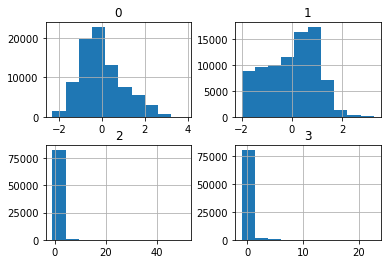

In [68]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
selected = df_total[["dif_dis_pl",	
                "dif_dis_fp",
                "dif_dis_blanco",
                "dif_dis_nulos"]]
df_dif_total = selected.copy()
#print(df_dif_distrito)
data = scaler.fit_transform(df_dif_total)
df_his = DataFrame(data)
print(df_his.describe())
df_his.hist()
plt.show()


                  0             1             2             3
count  8.291400e+04  8.291400e+04  8.291300e+04  8.291400e+04
mean  -3.153626e-16 -2.070424e-16  1.611111e-17  1.323152e-16
std    1.000006e+00  1.000006e+00  1.000006e+00  1.000006e+00
min   -2.301046e+00 -2.003187e+00 -1.024373e+00 -8.588741e-01
25%   -7.032544e-01 -8.179614e-01 -3.922380e-01 -8.588741e-01
50%   -1.560655e-01  1.535350e-01 -1.551872e-01 -2.629819e-01
75%    5.443364e-01  7.947226e-01  1.608805e-01  3.329102e-01
max    3.849358e+00  3.262323e+00  2.268070e+01  5.098374e+01


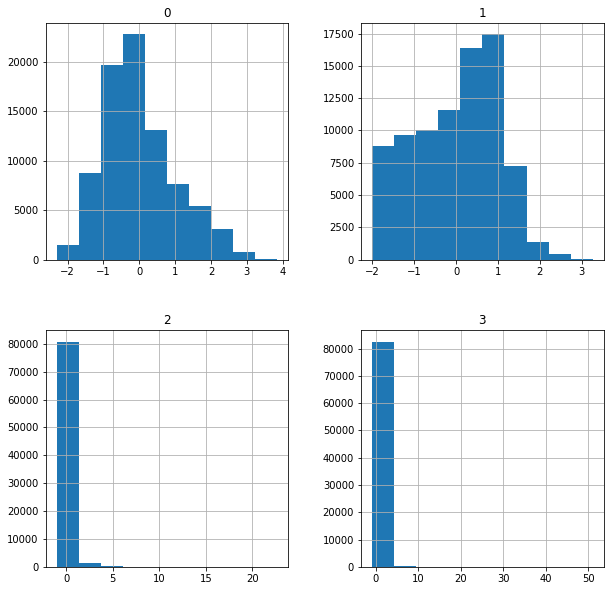

In [11]:
selected = df_total[["pl_p",	
                "fp_p",
                "nulos_p",
                "blanco_p"]]
df_dif_total = selected.copy()
#print(df_dif_distrito)
data = scaler.fit_transform(df_dif_total)
df_his = DataFrame(data)
print(df_his.describe())
df_his.hist()
plt.show()

In [12]:
from chart_studio import plotly
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)


<bound method DataFrame.transpose of            votos_fp      votos_pl  votos_en_blanco   votos_nulos
count  82914.000000  82914.000000     82914.000000  82913.000000
mean     103.098017    105.130328         1.441325     12.963974
std       51.467305     45.688332         1.678166     12.655593
min        0.000000      0.000000         0.000000      0.000000
25%       61.000000     73.000000         0.000000      8.000000
50%      111.000000     98.000000         1.000000     11.000000
75%      144.000000    130.000000         2.000000     15.000000
max      271.000000    281.000000        87.000000    300.000000>


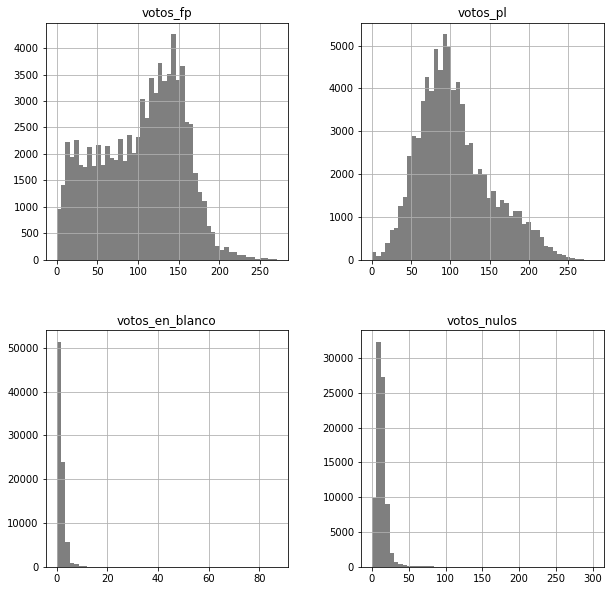

In [16]:
selected = df_total[["votos_fp",	
                "votos_pl",
                "votos_en_blanco",
                "votos_nulos"]]
df_dif_total = selected.copy()
data = df_dif_total 
df_his = DataFrame(data, columns=["votos_fp",	
                "votos_pl",
                "votos_en_blanco",
                "votos_nulos"])
print(df_his.describe().transpose)
df_his.hist(color="k", alpha=0.5, bins=50)
plt.show()

In [17]:
df_his.head()

votos_fp  votos_pl  votos_en_blanco  votos_nulos
0        81       118                1         14.0
1        87       123                0         16.0
2        73       122                2         19.0
3        89       131                3         14.0
4        95       107                1         19.0

In [18]:
df_his[['votos_fp', 'votos_pl', 'votos_en_blanco', 'votos_nulos']].iplot(kind='hist', histnorm='percent', barmode='overlay', xTitle='Votos', yTitle='(%) de candidatos blanco y nulo', title= 'Votos segunda vuelta')

In [19]:
import pandas as pd
from pandas import DataFrame
from bfl import *
import sqlite3
import matplotlib.pyplot as plt
con = sqlite3.connect("data/peroonpe.db")
cur = con.cursor()

In [20]:
df_ubicacion = pd.read_sql_query("select * from ubicacion where distrito like '%JESUS MARIA%'", con)
df_ubicacion.head()

id     distrito provincia departamento
0  1381  JESUS MARIA      LIMA         LIMA

In [6]:
df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where departamento = "CAJAMARCA")) order by V.mesa', con)
print(df_total)

        mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes
0      10259        86       124                1           12             223
1      10260        98       127                0           21             246
2      10261        83       147                0           10             240
3      10262        94       144                1            7             246
4      10263       104       122                5           13             244
...      ...       ...       ...              ...          ...             ...
3823  901098        17       140                6           22             185
3824  901099        30       143                3            5             181
3825  901100        36       150                2            2             190
3826  901101         8       159                6            0             173
3827  901102         8       158                3            6             175

[3828 rows x 6 columns]


In [14]:
# Distintos queries para seleccionar data.

#Total
#df_total = pd.read_sql_query("Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V  order by V.mesa", con)

#Jesus Maria
#df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where distrito = "SANTA MARIA DEL MAR" and provincia="LIMA")) order by V.mesa', con)

#Chota
#df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where distrito = "CHOTA" and provincia="CHOTA")) order by V.mesa', con)

#Cajamarca
from pandas import DataFrame

df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where departamento = "CAJAMARCA")) order by V.mesa', con)

#df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where distrito = "JESUS MARIA")) order by V.mesa', con)



print(df_total)

column_name = "votos_fp"

selected = df_total[[column_name]]
df_votos = selected.copy()

data = df_votos
df_his_votos = DataFrame(data, columns=[column_name])

lsunique, total_count, data_count, data_percentage = count_first_digit(df_his_votos, column_name)
print(lsunique)
print(total_count)
print(data_count)
print(data_percentage)

        mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes
0      10259        86       124                1           12             223
1      10260        98       127                0           21             246
2      10261        83       147                0           10             240
3      10262        94       144                1            7             246
4      10263       104       122                5           13             244
...      ...       ...       ...              ...          ...             ...
3823  901098        17       140                6           22             185
3824  901099        30       143                3            5             181
3825  901100        36       150                2            2             190
3826  901101         8       159                6            0             173
3827  901102         8       158                3            6             175

[3828 rows x 6 columns]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


observed counts = [3238, 103, 9, 30, 27, 42, 71, 113, 189]
expected counts = [1150, 673, 478, 371, 302, 256, 222, 195, 176] 

First Digit Probabilities:
1: observed: 0.847  expected: 0.301
2: observed: 0.027  expected: 0.176
3: observed: 0.002  expected: 0.125
4: observed: 0.008  expected: 0.097
5: observed: 0.007  expected: 0.079
6: observed: 0.011  expected: 0.067
7: observed: 0.019  expected: 0.058
8: observed: 0.030  expected: 0.051
9: observed: 0.049  expected: 0.046

Chi-squared Test Statistic = 5614.895
Critical value at a P-value of 0.05 is 15.51.
Observed distribution does not match expected.
/home/jorgealvarado/develop/python_election/elecciones2021/bfl.py:112: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


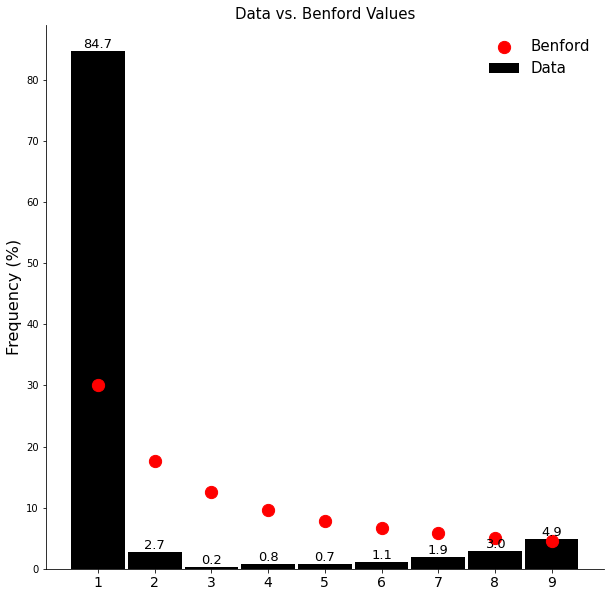

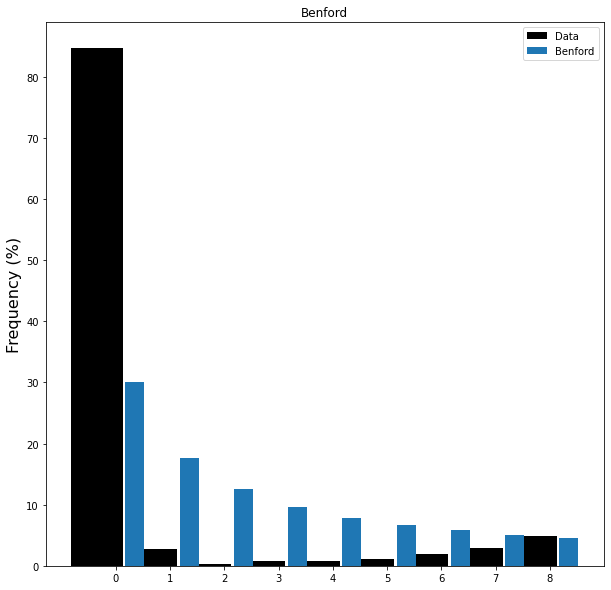

In [11]:
# Prueba usando una implementacion adaptada de primer digito con ley de Benford
# https://github.com/rlvaugh/Impractical_Python_Projects/blob/master/Chapter_16/benford.py
# https://github.com/eleprocha/Benford-s-Law_python_code

# H0: Observed and theorical distribution are the same
# a Significance level (p-value) is used is 0.05

from bfl import *

lsunique, total_count, data_count, data_percentage = count_first_digit(df_his_votos, column_name)
len_data_count = len(data_count)
expected_counts = get_expected_counts(total_count, len_data_count)

print("\nobserved counts = {}".format(data_count))

print("expected counts = {}".format(expected_counts), "\n")

print("First Digit Probabilities:")

for i in range(1, len(data_count)+1):

    print("{}: observed: {:.3f}  expected: {:.3f}".

            format(i, data_percentage[i - 1] / 100, BENFORD[i - 1] / 100))

if chi_square_test(data_count, expected_counts):
    print("Observed distribution matches expected distribution.")
else:
    print("Observed distribution does not match expected.") 


bar_chart(plt, data_percentage)

In [15]:
df_his_votos.head()

votos_fp
0        86
1        98
2        83
3        94
4       104


Initialized sequence with 3811 registries.

Test performed on 3811 registries.
Discarded 0 records < 1 after preparation.


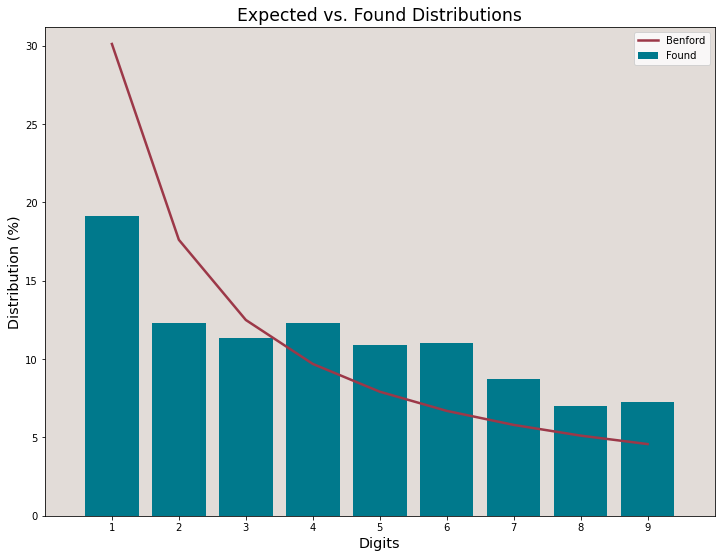

In [16]:
import benford as bf
fld = bf.first_digits(df_his_votos['votos_fp'], digs=1, decimals=3)

In [17]:
# Prueba de ejemplo para votos Illinois.
df = pd.read_csv('test/Clinton_votes_Illinois.txt', header=None, names=['votos'])


In [18]:
lsunique, total_count, data_count, data_percentage = count_first_digit(df, 'votos')
print(lsunique)
print(total_count)
print(data_count)
print(data_percentage)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
102
[38, 16, 11, 10, 8, 6, 5, 6, 2]
[37.254901960784316, 15.686274509803921, 10.784313725490197, 9.803921568627452, 7.8431372549019605, 5.88235294117647, 4.901960784313726, 5.88235294117647, 1.9607843137254901]


In [28]:
from bfl import *

lsunique, total_count, data_count, data_percentage = count_first_digit(df, 'votos')
len_data_count = len(data_count)
expected_counts = get_expected_counts(total_count, len_data_count)

print("\nobserved counts = {}".format(data_count))

print("expected counts = {}".format(expected_counts), "\n")

print("First Digit Probabilities:")

for i in range(1, len(data_count)+1):

    print("{}: observed: {:.3f}  expected: {:.3f}".

            format(i, data_percentage[i - 1] / 100, BENFORD[i - 1] / 100))

if chi_square_test(data_count, expected_counts):
    print("Observed distribution matches expected distribution.")
else:
    print("Observed distribution does not match expected.") 




observed counts = [38, 16, 11, 10, 8, 6, 5, 6, 2]
expected counts = [31, 18, 13, 10, 8, 7, 6, 5, 5] 

First Digit Probabilities:
1: observed: 0.373  expected: 0.301
2: observed: 0.157  expected: 0.176
3: observed: 0.108  expected: 0.125
4: observed: 0.098  expected: 0.097
5: observed: 0.078  expected: 0.079
6: observed: 0.059  expected: 0.067
7: observed: 0.049  expected: 0.058
8: observed: 0.059  expected: 0.051
9: observed: 0.020  expected: 0.046

Chi-squared Test Statistic = 4.420
Critical value at a P-value of 0.05 is 15.51.
Observed distribution matches expected distribution.


/home/jorgealvarado/develop/python_election/elecciones2021/bfl.py:112: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title('Percentage First Digits')


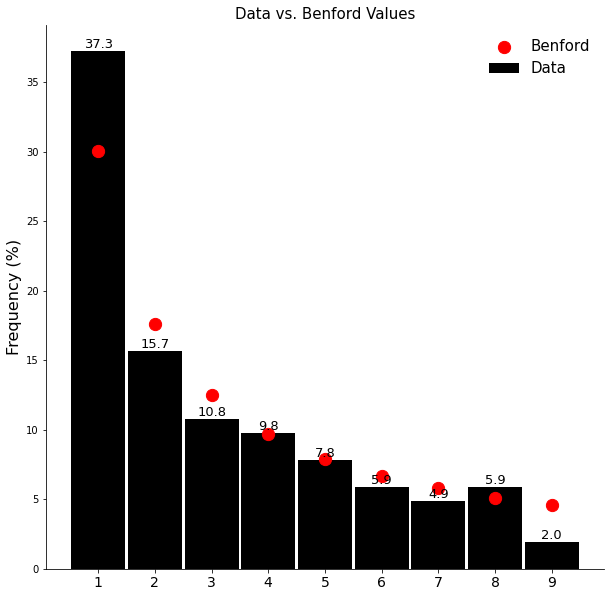

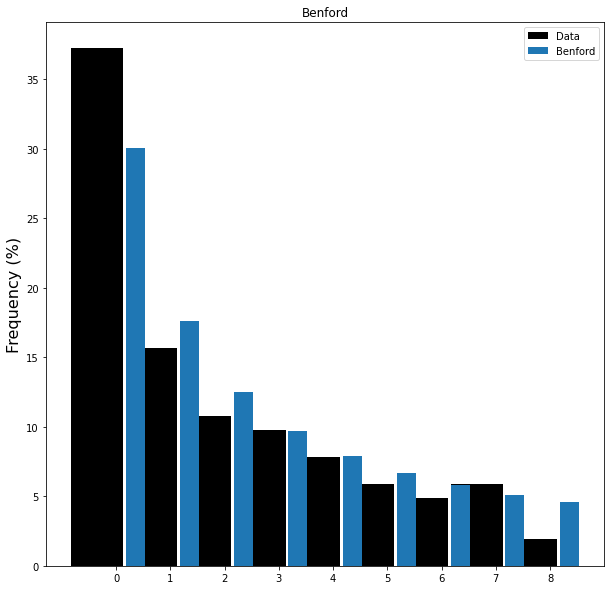

In [19]:
bar_chart(plt, data_percentage)


Initialized sequence with 102 registries.

Test performed on 102 registries.
Discarded 0 records < 1 after preparation.


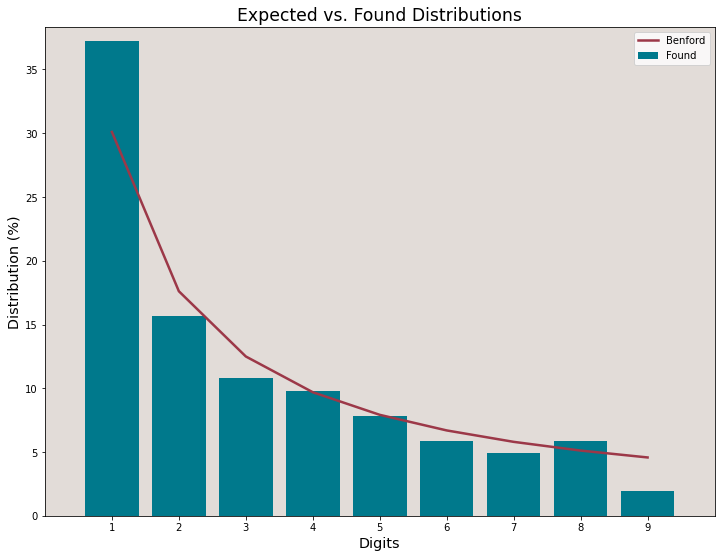

In [20]:
import benford as bf
fld = bf.first_digits(df['votos'], digs=1, decimals=3)

In [21]:
# Prueba con todos los votos para el test de First Digits usando la libreria
# https://github.com/milcent/benford_py

#df_total = pd.read_sql_query("Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V  order by V.mesa", con)

df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where distrito = "JESUS MARIA")) order by V.mesa', con)


Initialized sequence with 364 registries.

Test performed on 364 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_1_Dig                               
1             0.30103  0.928571  26.043975


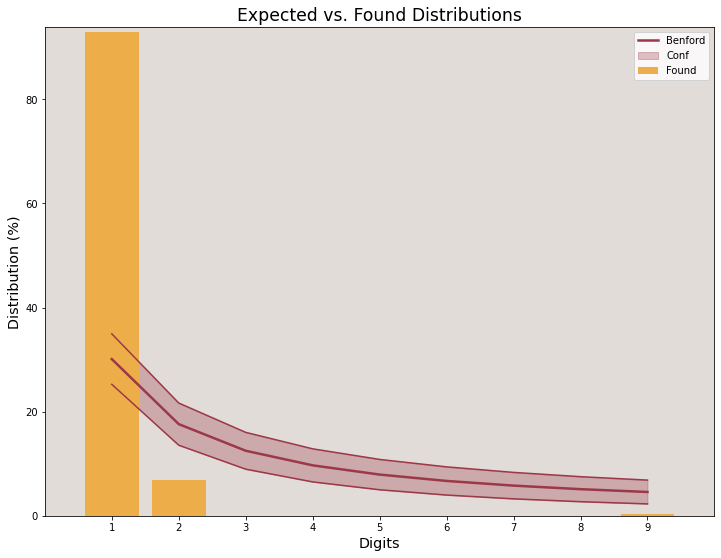

In [22]:
fld = bf.first_digits(df_total['votos_fp'], digs=1, decimals=8, confidence=95)


Initialized sequence with 364 registries.

Test performed on 364 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_1_Dig                               
5            0.079181  0.351648  19.154531
6            0.066947  0.200549  10.093910
4            0.096910  0.228022   8.366989


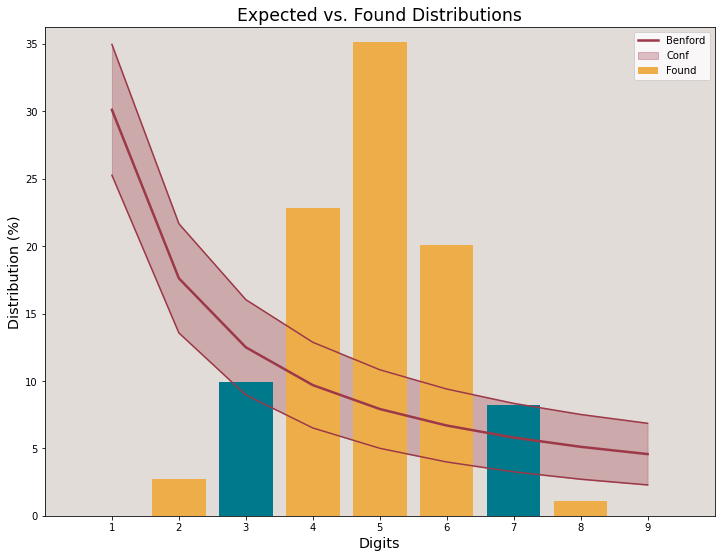

In [23]:
fld = bf.first_digits(df_total['votos_pl'], digs=1, decimals=8, confidence=95)


Initialized sequence with 364 registries.

Test performed on 364 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_score
First_2_Dig                               
57           0.007553  0.054945  10.140604
54           0.007969  0.049451   8.606350
60           0.007179  0.041209   7.380171
59           0.007299  0.041209   7.292323
48           0.008955  0.043956   6.810367
62           0.006949  0.035714   6.291130
52           0.008273  0.038462   6.069598
58           0.007424  0.035714   5.982327
63           0.006839  0.030220   5.094325
53           0.008118  0.032967   4.991306
61           0.007062  0.030220   4.963338
55           0.007825  0.030220   4.551501
56           0.007687  0.027473   4.022123
45           0.009545  0.030220   3.787166
49           0.008774  0.027473   3.544378
51           0.008433  0.024725   3.112569
46           0.009340  0.024725   2.779091
6

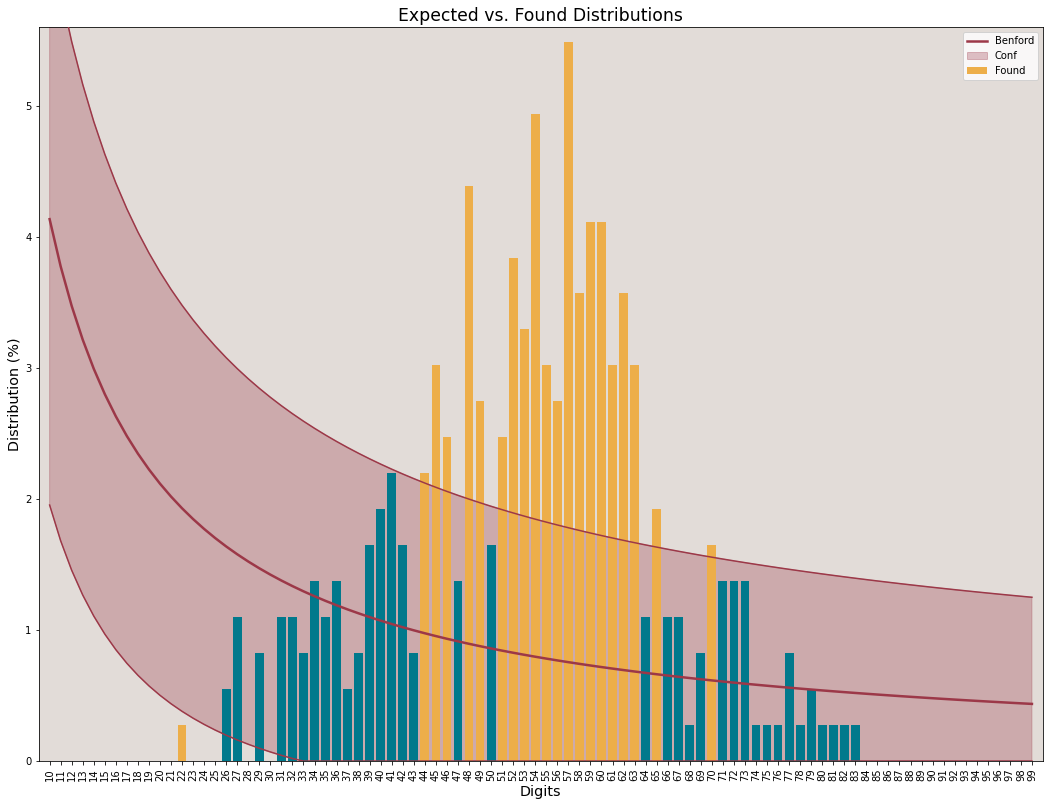

In [24]:
fld = bf.first_digits(df_total['votos_pl'], digs=2, decimals=8, confidence=95)


Initialized sequence with 56171 registries.

Test performed on 56171 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant positive deviations are:

             Expected     Found     Z_score
First_2_Dig                                
10           0.041393  0.440583  474.946245
20           0.021189  0.282423  429.895952
30           0.014240  0.145431  262.410816
40           0.010724  0.068345  132.566993
50           0.008600  0.032259   60.701757
60           0.007179  0.014029   19.205577
70           0.006160  0.007673    4.554948


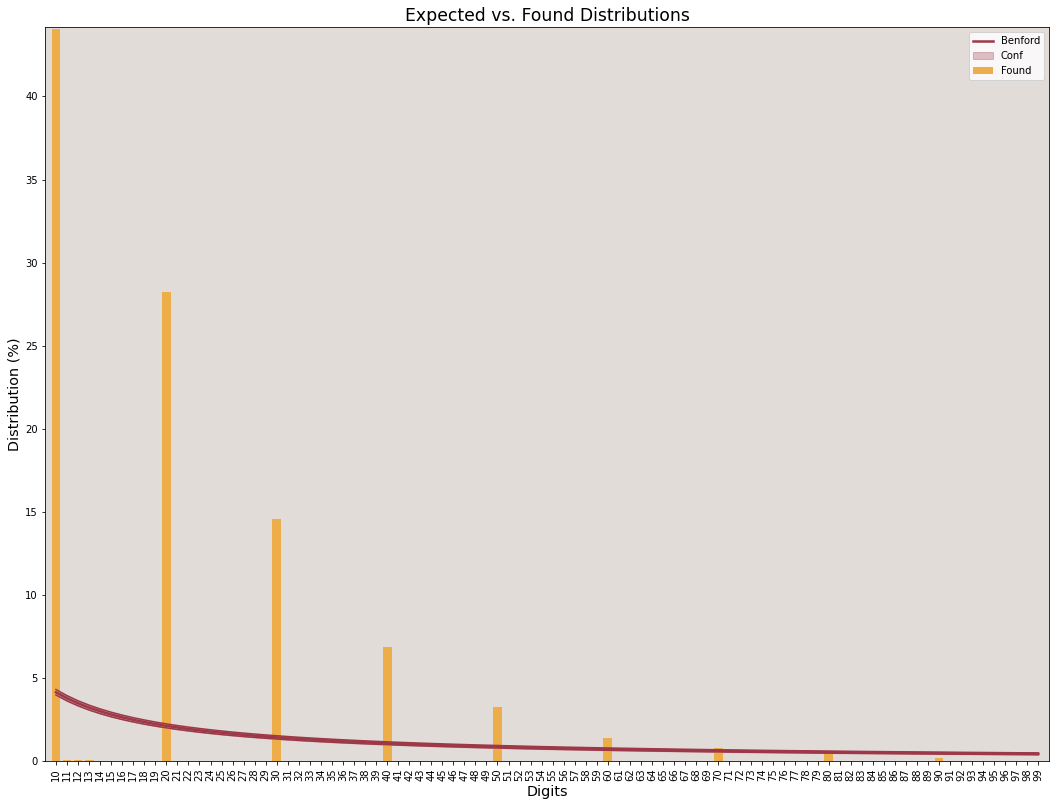

In [35]:
fld = bf.first_digits(df_total['votos_en_blanco'], digs=2, decimals=8, confidence=95)


Initialized sequence with 82497 registries.

Test performed on 82497 registries.
Discarded 0 records < 10 after preparation.


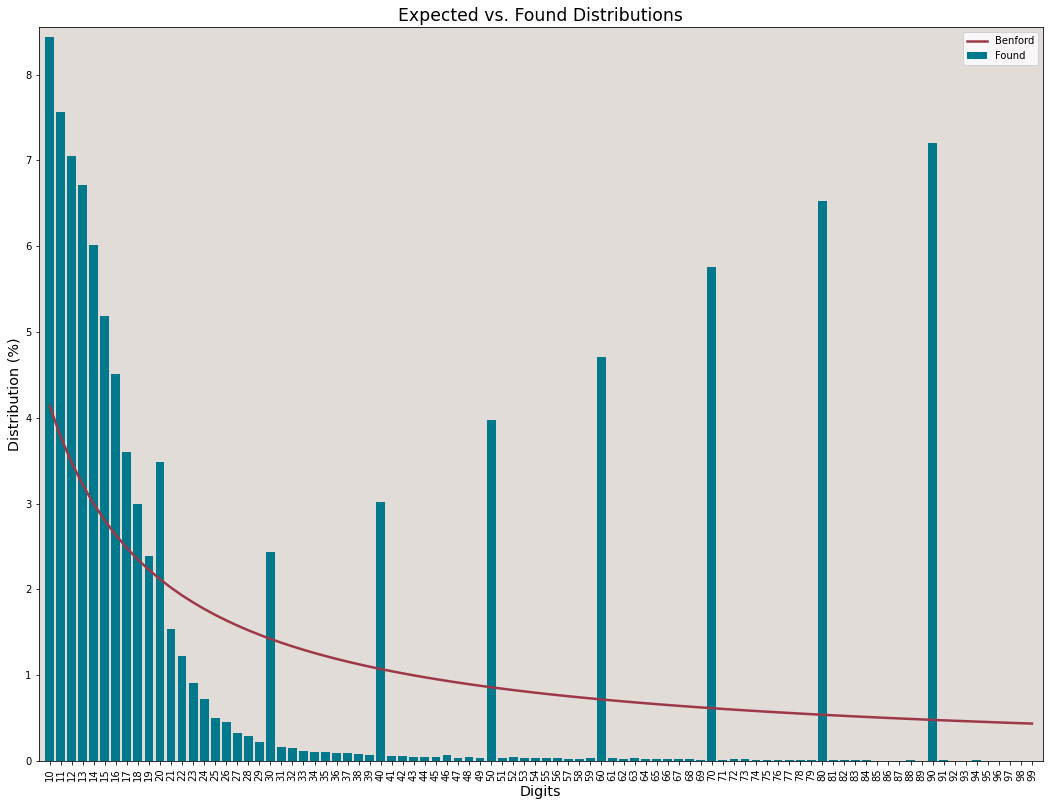

In [36]:
fld = bf.first_digits(df_total['votos_nulos'], digs=2, decimals=8)

In [39]:
df_total = pd.read_sql_query('Select  V.mesa, V.votos_fp, V.votos_pl, V.votos_en_blanco, V.votos_nulos, V.total_votantes from votos2V as V where V.local_id in (select L.id from Local as L where L.ubicacion_id in (select id from Ubicacion where departamento = "AREQUIPA")) order by V.mesa', con)

In [40]:
df_total.head()

mesa  votos_fp  votos_pl  votos_en_blanco  votos_nulos  total_votantes
0  4799       202        59                1           13             275
1  4800       198        50                2           19             269
2  4801       212        52                0           12             276
3  4802        95        62                1            9             167
4  4803        97        51                1            9             158

In [ ]:
fld = bf.first_digits(df_total['votos_f'], digs=2, decimals=8)